# Proyecto visualización - corte 1.
>  Jeiber Javier Diaz Espitia




In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data

In [4]:
pd.set_option('display.max_columns', None) #Mostrar todas las columnas
sns.set(rc={'figure.figsize':(12.7,8.6)})

### Contexto de los datos
Los datos presentados resultan de la medición de la prevalencia de enfermedades mentales en diferentes países. Las enfermedades contempladas resultan de esquizofrenia, transtorno de bipolaridad, desórdenes de alimentación, desórdenes de ansiedad, depresion y desórden mental causado por el consumo de drogas o alcohol.

Estas mediciones son tomadas anualmente, encontrandose registros desde 1990 hasta el 2007.

### Cargue de la información

In [ ]:
# from google.colab import files
# files.upload()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
df_mhd = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Mental health Depression disorder Data.xlsx',
                       dtype={ 
                     'Year': int      # Año, es un factor pero cae en str?
                 })
df_mhd.head()

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


## ***Abstracción***

In [25]:
df_mhd.dtypes    # Tipo de datos

Entity                        object
Code                          object
Year                           int64
Schizophrenia (%)            float64
Bipolar disorder (%)         float64
Eating disorders (%)         float64
Anxiety disorders (%)        float64
Drug use disorders (%)       float64
Depression (%)               float64
Alcohol use disorders (%)    float64
dtype: object

### **¿Qué?**
Se observa un dataset de tipo tabla, el cual presenta items, atributos y registros temporales que, en este caso, resutan de mediciones anuales.

Entre sus registros evidencian atributos categóricos que resultan ser la entidad (Entity) y codigo (Code). Estos son los registros de los países de las respectivas mediciones, siendo la entidad el nombre del país y el código su abreviatura. 

El año (Year) es un atributo cuantitativo ordenado secuencial.

Finalmente, las variables refrentes a la prevalencia de los diferentes transtornos mentales resutan de atributos cuantitativos.

### POTENCIALES VISUALIZACIONES

In [26]:
df_mhd_countries = df_mhd[(df_mhd['Code'] == "COL") | (df_mhd['Code'] == "USA") | (df_mhd['Code'] == "ITA") | (df_mhd['Code'] == "ESP")]
df_mhd_countries.head()

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
1288,Colombia,COL,1990,0.198016,0.749228,0.209751,2.617823,0.948445,2.268150,1.409241
1289,Colombia,COL,1991,0.198541,0.749668,0.210789,2.618356,0.944918,2.280578,1.425829
1290,Colombia,COL,1992,0.198989,0.750069,0.211634,2.619852,0.942951,2.293496,1.443448
1291,Colombia,COL,1993,0.199349,0.750434,0.212431,2.621955,0.940979,2.304626,1.461915
1292,Colombia,COL,1994,0.199611,0.750772,0.213249,2.624420,0.939767,2.316248,1.480987


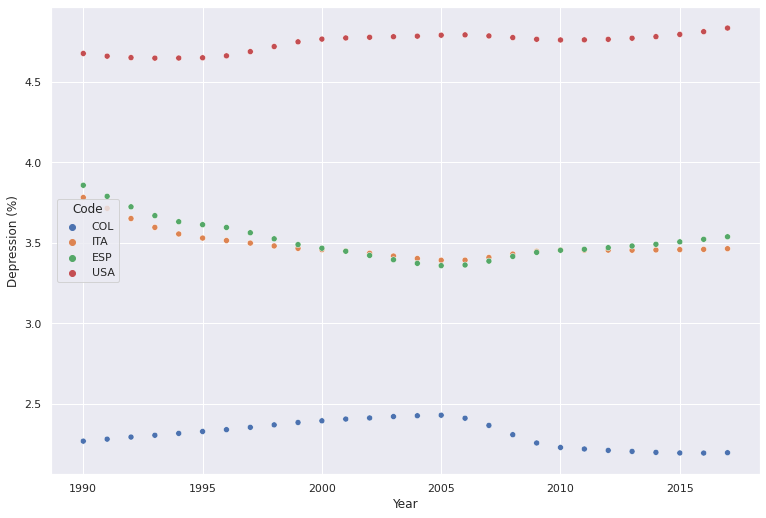

In [49]:
sns.scatterplot(data=df_mhd_countries,  x="Year", y="Depression (%)",
                hue = "Code") 

In [28]:
df_mhd_countries2 = df_mhd_countries[(df_mhd_countries['Year'] == 1990) | 
                                     (df_mhd_countries['Year'] == 2005) | 
                                     (df_mhd_countries['Year'] == 2017)]
df_mhd_countries2.head()

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
1288,Colombia,COL,1990,0.198016,0.749228,0.209751,2.617823,0.948445,2.268150,1.409241
1303,Colombia,COL,2005,0.200364,0.755098,0.221817,2.724836,1.033644,2.429338,1.602384
1315,Colombia,COL,2017,0.207211,0.768913,0.260257,2.514803,1.075526,2.196154,1.758512
2828,Italy,ITA,1990,0.234853,0.946082,0.585684,5.727693,1.246685,3.782417,0.458408
2843,Italy,ITA,2005,0.236527,0.944578,0.638136,5.367484,1.476299,3.392412,0.451417


In [29]:
bars = alt.Chart(df_mhd_countries2).mark_bar().encode(
    x=alt.X('Depression (%):Q',
            stack = "normalize"),
    y=alt.Y('Year:N'),
    color=alt.Color('Code')
)
text = alt.Chart(df_mhd_countries2).mark_text(dx=-5, dy=0, color='black',size = 8).encode(
    x=alt.X('Depression (%):Q',
            stack='normalize'),
    y=alt.Y('Year:N'),
    detail='Code:N',
    text=alt.Text('Depression (%):Q', format='.1f')
)
chart = bars + text
chart.properties(
    width=600,
    height=150
)

alt.LayerChart(...)

In [30]:
import altair as alt

stripplot =  alt.Chart(df_mhd_countries, width=200).mark_circle(size=20).encode(
    x=alt.X(
        'jitter:Q',
        title=None,
        axis=alt.Axis(values=[0], ticks=True, grid=False, labels=False),
        scale=alt.Scale(),
    ),
    y=alt.Y('Schizophrenia (%)'),
    color=alt.Color('Code:N', legend=None),
    column=alt.Column(
        'Code:N',
        header=alt.Header(
            labelAngle=-90,  # -90
            titleOrient='top',
            labelOrient='bottom',
            labelAlign='right',
            labelPadding=5,
        ),
    ),
).transform_calculate(
    # Generate Gaussian jitter with a Box-Muller transform
    jitter='sqrt(-2*log(random()))*cos(2*PI*random())'
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
)

stripplot

alt.Chart(...)

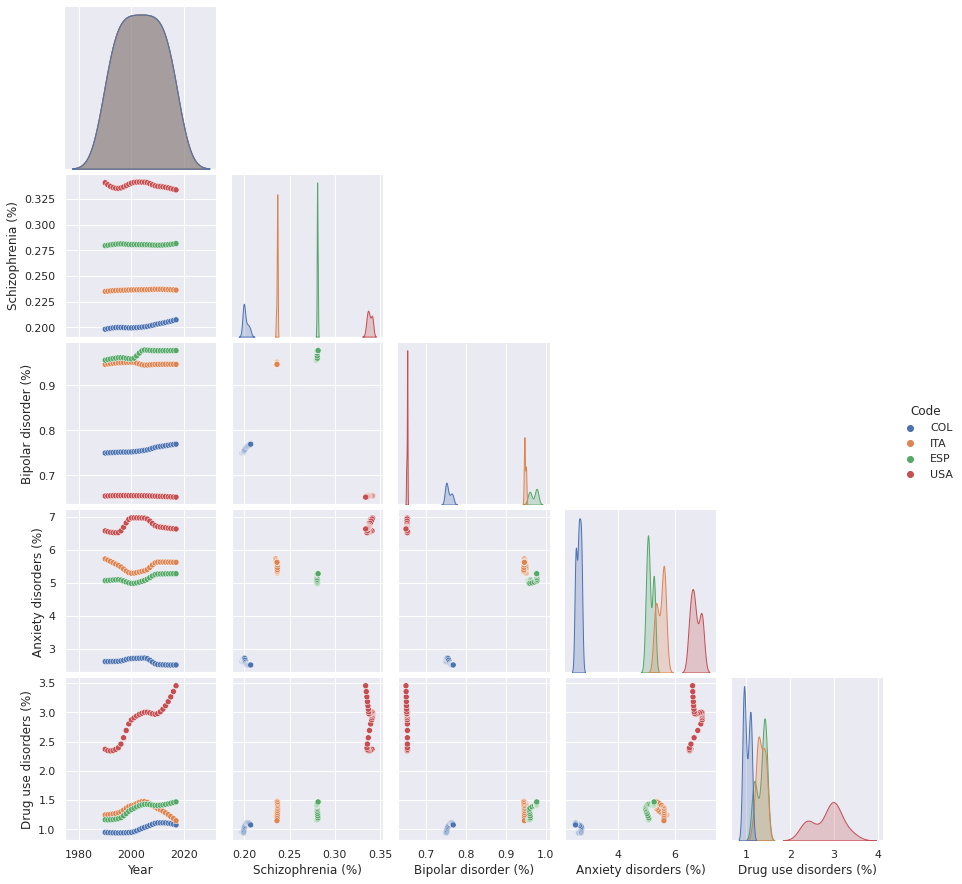

In [46]:
df_mhd_red = df_mhd_countries.iloc[:,[1,2,3,4,6,7]]
#df_mhd_red.head
sns.pairplot(df_mhd_red, 
             hue = "Code",
             corner = True)

In [47]:
alt.Chart(df_mhd_countries).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Code:N'
).properties(
    width=150,
    height=150
).repeat(
    row=['Year', 'Schizophrenia (%)', 'Bipolar disorder (%)'],
    column=['Year', 'Schizophrenia (%)', 'Bipolar disorder (%)']
)

alt.RepeatChart(...)

## Referencias
Datos recuperados de
https://data.world/vizzup/mental-health-depression-disorder-data/workspace/file?filename=Mental+health+Depression+disorder+Data.xlsx
